### Import Statements

In [14]:
import sys

import scipy.spatial.distance

sys.path.append(r'/Users/liamjeske/PycharmProjects/pythonProject2/src')

In [15]:
import Supervised.DistanceClassifier as DC
help(DC)

Help on module Supervised.DistanceClassifier in Supervised:

NAME
    Supervised.DistanceClassifier

CLASSES
    Supervised.Classifier.Classifier(abc.ABC)
        DistanceClassifier
    
    class DistanceClassifier(Supervised.Classifier.Classifier)
     |  DistanceClassifier(func=<function euclidean at 0x11a5e56c0>)
     |  
     |  Implementation of the Distance Classifier
     |  
     |  Method resolution order:
     |      DistanceClassifier
     |      Supervised.Classifier.Classifier
     |      abc.ABC
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, func=<function euclidean at 0x11a5e56c0>)
     |      initialize the algorithm by setting the distance metric to be used
     |      :param func: method of comparison
     |  
     |  fit(self, X, y)
     |      fit the model to the training data
     |      :param X: training data
     |      :param y: training labels
     |      :return: None
     |  
     |  predict(self, X)
    

In [16]:
import numpy as np
from scipy.spatial.distance import pdist

from Supervised.LinearDiscriminantAnalysis import LDA
from scipy.io import loadmat
import matplotlib.pyplot as plt
from util import accuracy

from Supervised.DistanceClassifier import DistanceClassifier as DC
from Supervised.KNearestNeighbors import KNearestNeighbor as KNN

# Load ECG data
(talk more about the dataset here)

In [17]:
mat1 = loadmat(r'/Users/liamjeske/Downloads/ECG_train.mat',simplify_cells=True)
ECG_test_abnormal1 = mat1['X_train_abnormal']
ECG_test_normal1 = mat1['X_train_normal']

# 64 normal and 36 abnormal
ECG_trainy = np.array([0]*64 + [1]*36)
ECG_trainX = np.array( np.append(ECG_test_normal1, ECG_test_abnormal1, axis=0))
# Testing DATA
mat2 = loadmat(r'/Users/liamjeske/Downloads/ECG_test.mat', simplify_cells=True)
ECG_test_abnormal2 = mat2['X_test_abnormal']
ECG_test_normal2 = mat2['X_test_normal']

# 64 normal and 36 abnormal
ECG_testy = np.array([0]*len(ECG_test_normal2) + [1]*len(ECG_test_abnormal2))
ECG_testX = np.array( np.append(ECG_test_normal2, ECG_test_abnormal2, axis=0))

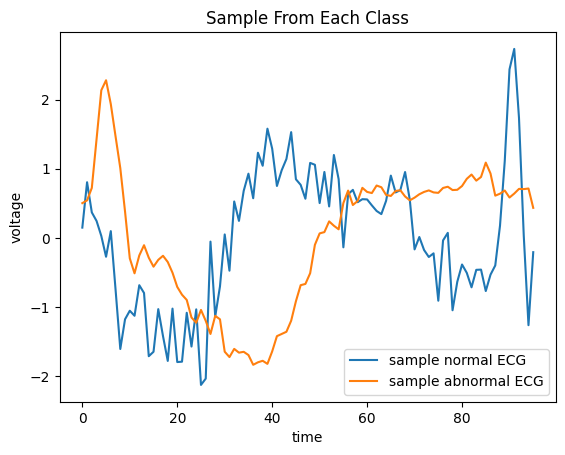

In [18]:
plt.plot(ECG_test_normal1[0], label= "sample normal ECG")
plt.plot(ECG_test_abnormal1[0], label="sample abnormal ECG")
plt.xlabel("time")
plt.ylabel("voltage")
plt.title("Sample From Each Class")
plt.legend()

### Distance Classifier

###### Distance classifiers are very simple classifier.  The steps to a distance classifier are as follows.
Fitting:
1.) Partition the data by label
2.) Compute the center of each data partition

Predicting:
3.) Calculate the distance of each test data point to each data center
4.) Assign the label of the closest data center to each point

In [19]:
dc = DC()
dc.fit(ECG_trainX, ECG_trainy)
dc.score(ECG_testX, ECG_testy)

0.75

In [20]:
import util

In [28]:
import scipy
util.dm(ECG_testX, ECG_testy, func=scipy.spatial.distance.euclidean)

ValueError: Input vector should be 1-D.